In [54]:
#Librerías
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [27]:
map_data = gpd.read_file("natalidad.geojson")
map_data = map_data[["NAME_1", "NAME_2", "geometry"]]
map_data = map_data.rename(columns={"NAME_1": "CC_AA", "NAME_2": "Provincia"})
map_data.head()

,CC_AA,Provincia,geometry
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [73]:
defunciones_data = pd.read_excel("defunciones.xlsx", usecols=["Provincia", "Sexo", "Total"])
defunciones_data["Provincia"] = defunciones_data["Provincia"].apply(lambda x: re.sub(r'^\d+\s', '', x))
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Bizkaia', 'Vizcaya')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Araba/Álava', 'Álava')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Balears, Illes', 'Baleares')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Castellón/Castelló', 'Castellón')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Coruña, A', 'A Coruña')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Valencia/València', 'Valencia')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Rioja, La', 'La Rioja')
defunciones_data['Provincia'] = defunciones_data['Provincia'].replace('Gipuzkoa', 'Guipúzcoa')
merged_data = pd.merge(map_data, defunciones_data, on="Provincia")
merged_data

,CC_AA,Provincia,geometry,Sexo,Total
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",Hombres,3371
1,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",Mujeres,2832
2,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",Hombres,6065
3,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",Mujeres,5628
4,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",Hombres,4253
...,...,...,...,...,...
91,País Vasco,Vizcaya,"MULTIPOLYGON (((-2.49458 43.36819, -2.49458 43...",Mujeres,6321
92,Principado de Asturias,Asturias,"MULTIPOLYGON (((-6.03181 43.59125, -6.03181 43...",Hombres,6440
93,Principado de Asturias,Asturias,"MULTIPOLYGON (((-6.03181 43.59125, -6.03181 43...",Mujeres,6927
94,Región de Murcia,Murcia,"MULTIPOLYGON (((-1.54680 37.40990, -1.54681 37...",Hombres,6578


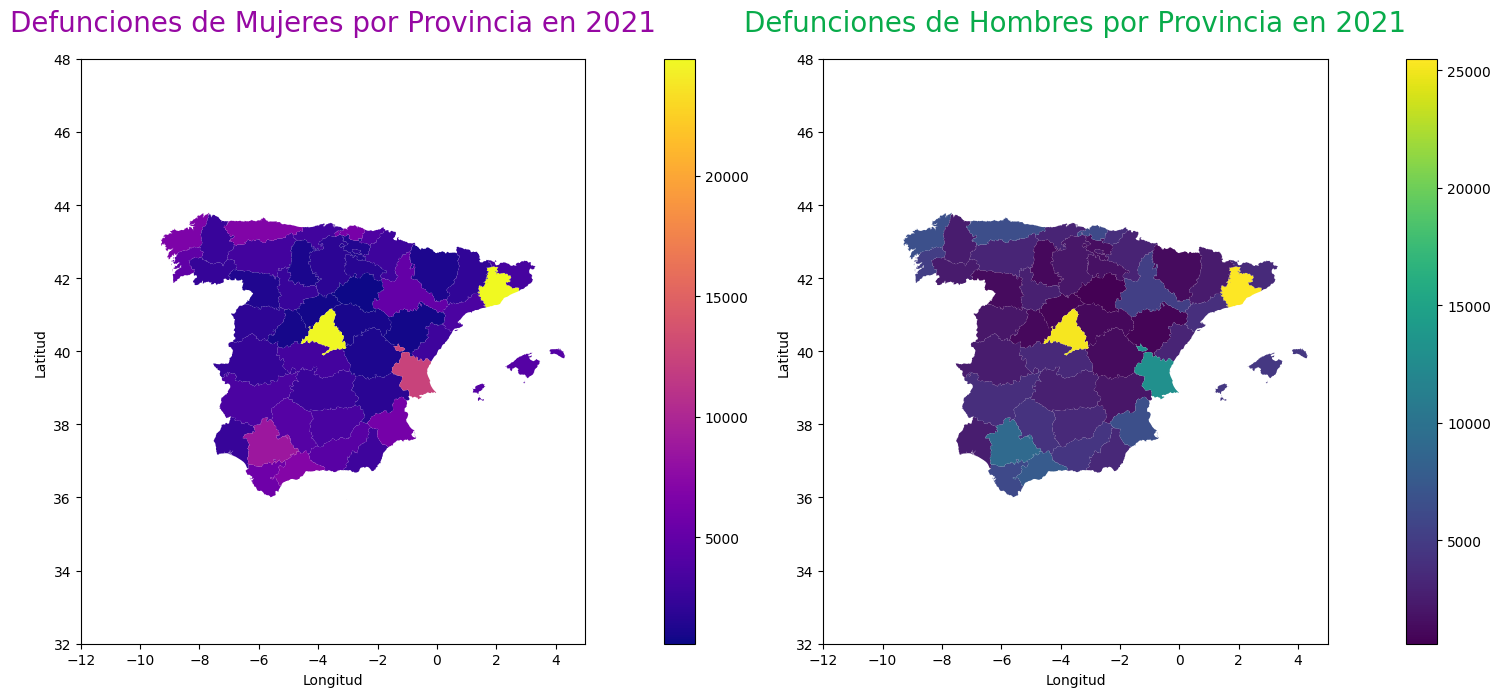

In [74]:
mujeres_data = merged_data[merged_data['Sexo'] == 'Mujeres']
hombres_data = merged_data[merged_data['Sexo'] == 'Hombres']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.axis([-12, 5, 32, 48])
ax2.axis([-12, 5, 32, 48])

ax1.set_title('Defunciones de Mujeres por Provincia en 2021',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#9608a3'})
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')

ax2.set_title('Defunciones de Hombres por Provincia en 2021',
             pad=20,
             fontdict={'fontsize': 20, 'color': '#08ab4a'})
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.2)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.2)

mujeres_data.plot(column='Total', cmap='plasma', ax=ax1,
                  legend=True, cax=cax1, zorder=5)
hombres_data.plot(column='Total', cmap='viridis', ax=ax2,
                  legend=True, cax=cax2, zorder=5)

plt.tight_layout()
plt.show()
